In [1]:
import os
import json
import statistics

import xml.etree.ElementTree as ET

import matplotlib.pyplot as plt

In [2]:
def xml_to_dict(element):
    children = list(element)

    if not children:
        if element.attrib:
            d = dict(element.attrib)
            texto = element.text.strip() if element.text and element.text.strip() else None
            if texto:
                d['text'] = texto
            return {element.tag: d if d else texto if texto else ""}
        else:
            texto = element.text.strip() if element.text and element.text.strip() else ""
            return {element.tag: texto}

    result = {}

    for child in children:
        child_dict = xml_to_dict(child)
        for k, v in child_dict.items():
            if k in result:
                if not isinstance(result[k], list):
                    result[k] = [result[k]]
                result[k].append(v)
            else:
                result[k] = v

    if element.attrib:
        for attr_key, attr_val in element.attrib.items():
            result[attr_key] = attr_val

    texto = element.text.strip() if element.text and element.text.strip() else None
    if texto:
        result['text'] = texto

    return {element.tag: result}

In [3]:
all_boxes = {
    'WBC': [],
    'RBC': [],
    'Platelets': []
}

In [4]:
annotations_dir = 'BCCD/annotations'

for file_name in os.listdir(annotations_dir):
    if file_name.endswith('.xml'):
        file_path = os.path.join(annotations_dir, file_name)
        tree = ET.parse(file_path)
        root = tree.getroot()

        annotation_dict = xml_to_dict(root)
        for i in annotation_dict['annotation']['object']:
            try:
                lenx = abs(int(i['bndbox']['xmin']) - int(i['bndbox']['xmax']))
                leny = abs(int(i['bndbox']['ymin']) - int(i['bndbox']['ymax']))
                if lenx == 0 or leny == 0:
                    continue
            except:
                continue
            tmp = {
                'filename': annotation_dict['annotation']['filename'],
                'xmin': int(i['bndbox']['xmin']),
                'xmax': int(i['bndbox']['xmax']),
                'ymin': int(i['bndbox']['ymin']),
                'ymax': int(i['bndbox']['ymax']),
                'lenx': lenx,
                'leny': leny
            }
            if i['name'] == 'WBC':
                all_boxes['WBC'].append(tmp)
            elif i['name'] == 'RBC':
                all_boxes['RBC'].append(tmp)
            elif i['name'] == 'Platelets':
                all_boxes['Platelets'].append(tmp)

In [5]:
with open('all_boxes.json', 'w') as json_file:
    json.dump(all_boxes, json_file, indent=4)

In [6]:
len_WBC = len(all_boxes['WBC'])
len_RBC = len(all_boxes['RBC'])
len_Platelets = len(all_boxes['Platelets'])

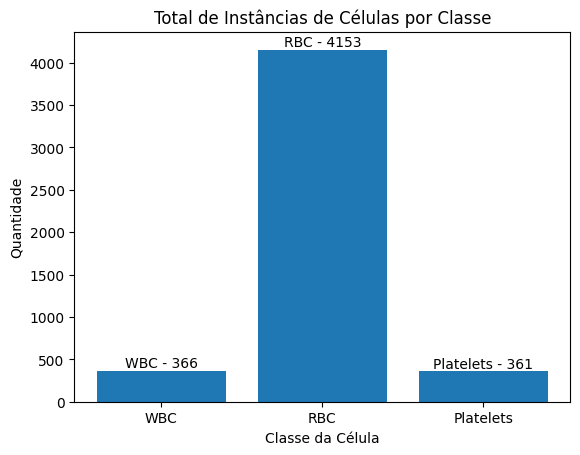

In [ ]:
labels = ['WBC', 'RBC', 'Platelets']
values = [len_WBC, len_RBC, len_Platelets]

colors = ['#1f77b4', '#1f77b4', '#1f77b4']
bars = plt.bar(labels, values, color=colors)

plt.title('Total de Instâncias de Células por Classe')
plt.xlabel('Classe da Célula')
plt.ylabel('Quantidade')

for bar, label, value in zip(bars, labels, values):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{label} - {value}', ha='center', va='bottom')

plt.show()

In [8]:
lenx_WBC = [box['lenx'] for box in all_boxes['WBC']]
leny_WBC = [box['leny'] for box in all_boxes['WBC']]
lenx_RBC = [box['lenx'] for box in all_boxes['RBC']]
leny_RBC = [box['leny'] for box in all_boxes['RBC']]
lenx_Platelets = [box['lenx'] for box in all_boxes['Platelets']]
leny_Platelets = [box['leny'] for box in all_boxes['Platelets']]

In [9]:
print(f'Lenx WBC - Média: {statistics.mean(lenx_WBC)}, Mínimo: {min(lenx_WBC)}, Máximo: {max(lenx_WBC)}')
print(f'Leny WBC - Média: {statistics.mean(leny_WBC)}, Mínimo: {min(leny_WBC)}, Máximo: {max(leny_WBC)}')
print(f'Lenx RBC - Média: {statistics.mean(lenx_RBC)}, Mínimo: {min(lenx_RBC)}, Máximo: {max(lenx_RBC)}')
print(f'Leny RBC - Média: {statistics.mean(leny_RBC)}, Mínimo: {min(leny_RBC)}, Máximo: {max(leny_RBC)}')
print(f'Lenx Platelets - Média: {statistics.mean(lenx_Platelets)}, Mínimo: {min(lenx_Platelets)}, Máximo: {max(lenx_Platelets)}')
print(f'Leny Platelets - Média: {statistics.mean(leny_Platelets)}, Mínimo: {min(leny_Platelets)}, Máximo: {max(leny_Platelets)}')

Lenx WBC - Média: 193.7704918032787, Mínimo: 31, Máximo: 338
Leny WBC - Média: 175.66666666666666, Mínimo: 27, Máximo: 286
Lenx RBC - Média: 104.48182037081628, Mínimo: 42, Máximo: 168
Leny RBC - Média: 100.38983867084036, Mínimo: 39, Máximo: 166
Lenx Platelets - Média: 41.57617728531856, Mínimo: 19, Máximo: 167
Leny Platelets - Média: 40.18005540166205, Mínimo: 23, Máximo: 135


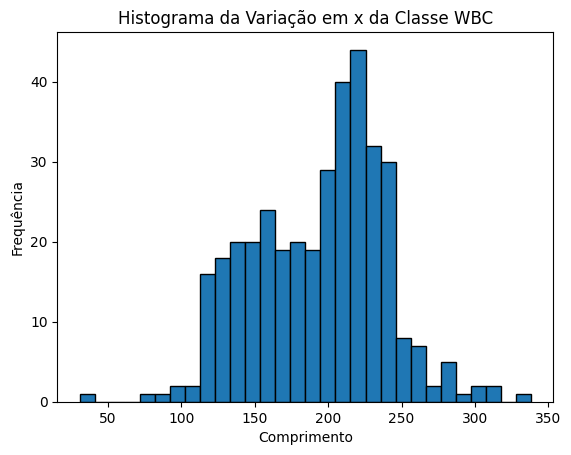

In [10]:
plt.hist(lenx_WBC, bins=30, color='#1f77b4', edgecolor='black')
plt.title('Histograma da Variação em x da Classe WBC')
plt.xlabel('Comprimento')
plt.ylabel('Frequência')
plt.show()

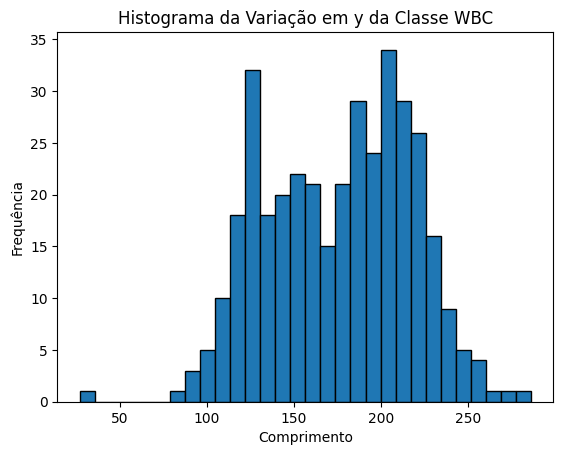

In [11]:
plt.hist(leny_WBC, bins=30, color='#1f77b4', edgecolor='black')
plt.title('Histograma da Variação em y da Classe WBC')
plt.xlabel('Comprimento')
plt.ylabel('Frequência')
plt.show()

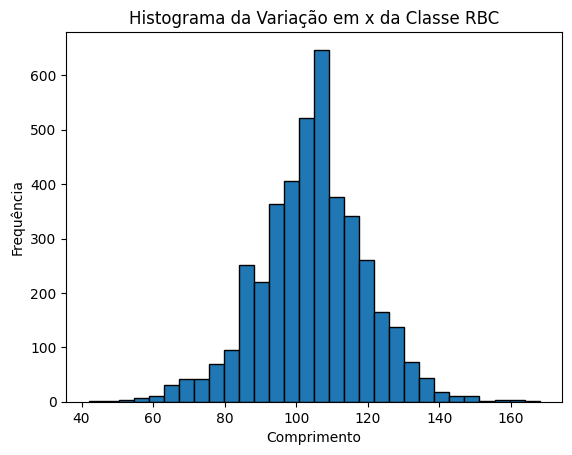

In [12]:
plt.hist(lenx_RBC, bins=30, color='#1f77b4', edgecolor='black')
plt.title('Histograma da Variação em x da Classe RBC')
plt.xlabel('Comprimento')
plt.ylabel('Frequência')
plt.show()

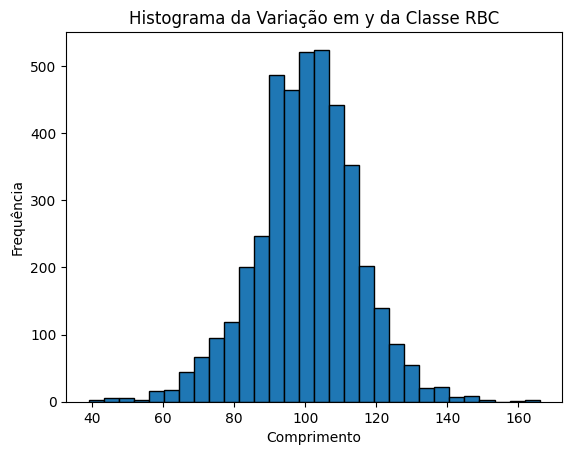

In [13]:
plt.hist(leny_RBC, bins=30, color='#1f77b4', edgecolor='black')
plt.title('Histograma da Variação em y da Classe RBC')
plt.xlabel('Comprimento')
plt.ylabel('Frequência')
plt.show()

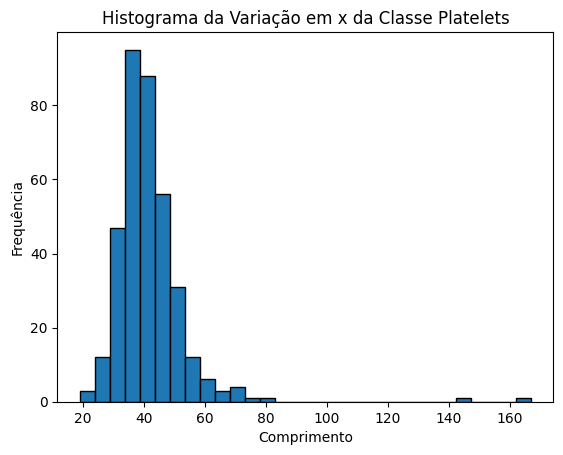

In [14]:
plt.hist(lenx_Platelets, bins=30, color='#1f77b4', edgecolor='black')
plt.title('Histograma da Variação em x da Classe Platelets')
plt.xlabel('Comprimento')
plt.ylabel('Frequência')
plt.show()

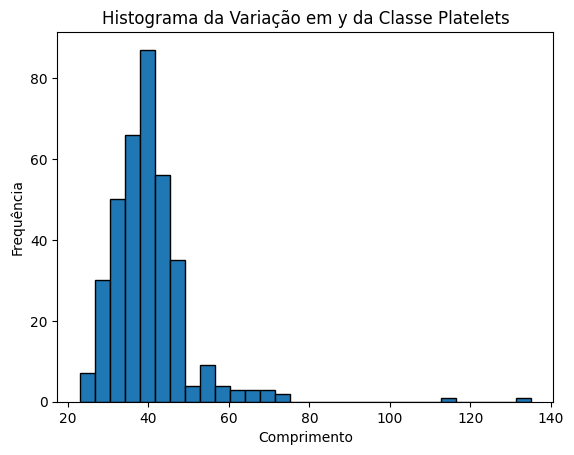

In [15]:
plt.hist(leny_Platelets, bins=30, color='#1f77b4', edgecolor='black')
plt.title('Histograma da Variação em y da Classe Platelets')
plt.xlabel('Comprimento')
plt.ylabel('Frequência')
plt.show()